# Análise Exploratória Final - Dataset Healful

**Objetivo:** Análise exploratória completa do dataset Healful combinando três perspectivas:
1. Análise Exploratória Geral (estrutura, correlações, distribuições)
2. Análise de Participantes (distribuição de registros, heterogeneidade)
3. Análise de Qualidade dos Dados (integridade, consistência, problemas)

**Dataset:** Healful - Qualidade de Vida (Psychological & Physical)
- 1.373 registros originais
- 35 participantes
- Período: 20211223 a 20230114 (~13 meses)
- 88 features preditoras + 2 targets (psy_ref_score, phy_ref_score)

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
from datetime import datetime
import json

warnings.filterwarnings('ignore')

# Configuração de visualização
plt.rcParams['figure.figsize'] = (14, 8)
sns.set_style("whitegrid")
plt.rcParams['font.size'] = 11

print("✅ Bibliotecas importadas com sucesso")

✅ Bibliotecas importadas com sucesso


## 1. Carregamento dos Dados

In [5]:
# Caminhos dos arquivos
psychological_path = "../../data/raw/20230625-processed-psychological-qol.csv"
physical_path = "../../data/raw/20230625-processed-physical-qol.csv"

# Carregar datasets
try:
    df_psychological = pd.read_csv(psychological_path)
    df_physical = pd.read_csv(physical_path)
    print("✅ Datasets carregados com sucesso!\n")
    print(f"Psychological QoL: {df_psychological.shape[0]} linhas × {df_psychological.shape[1]} colunas")
    print(f"Physical QoL: {df_physical.shape[0]} linhas × {df_physical.shape[1]} colunas")
except Exception as e:
    print(f"❌ Erro ao carregar datasets: {e}")

✅ Datasets carregados com sucesso!

Psychological QoL: 1373 linhas × 90 colunas
Physical QoL: 1373 linhas × 90 colunas


## 2. ANÁLISE DE PARTICIPANTES

Caracterização da população do estudo e distribuição de registros por participante.

In [6]:
print("="*70)
print("ANÁLISE DE PARTICIPANTES")
print("="*70)

# Análise de participantes únicos
ids_psych = set(df_psychological['id'].unique())
ids_phys = set(df_physical['id'].unique())
ids_comum = ids_psych.intersection(ids_phys)

print("\n👥 PARTICIPANTES ÚNICOS:")
print(f"   Dataset Psicológico: {len(ids_psych)} participantes")
print(f"   Dataset Físico: {len(ids_phys)} participantes")
print(f"   Participantes em ambos: {len(ids_comum)} participantes")

# Verificar se são os mesmos participantes
if ids_psych == ids_phys:
    print("   ✅ Os mesmos participantes estão em ambos os datasets")
else:
    print("   ⚠️  Participantes diferentes entre datasets")
    only_psych = ids_psych - ids_phys
    only_phys = ids_phys - ids_psych
    if only_psych:
        print(f"   Apenas no psicológico: {len(only_psych)} - {list(only_psych)}")
    if only_phys:
        print(f"   Apenas no físico: {len(only_phys)} - {list(only_phys)}")

ANÁLISE DE PARTICIPANTES

👥 PARTICIPANTES ÚNICOS:
   Dataset Psicológico: 35 participantes
   Dataset Físico: 35 participantes
   Participantes em ambos: 35 participantes
   ✅ Os mesmos participantes estão em ambos os datasets


In [7]:
# Análise detalhada de registros por participante
registros_psych = df_psychological['id'].value_counts().sort_index()
registros_phys = df_physical['id'].value_counts().sort_index()

print("\n📊 DISTRIBUIÇÃO DE REGISTROS POR PARTICIPANTE:")
print(f"   Psicológico - Min: {registros_psych.min()} | Max: {registros_psych.max()} | Média: {registros_psych.mean():.1f}")
print(f"   Físico - Min: {registros_phys.min()} | Max: {registros_phys.max()} | Média: {registros_phys.mean():.1f}")

# Top 10 participantes com mais registros
print("\n🔝 TOP 10 PARTICIPANTES COM MAIS REGISTROS:")
top10 = registros_psych.sort_values(ascending=False).head(10)
for i, (participant_id, count) in enumerate(top10.items(), 1):
    print(f"   {i:2d}. {participant_id}: {count} registros")

# Bottom 10 participantes com menos registros
print("\n⬇️  PARTICIPANTES COM MENOS REGISTROS:")
bottom10 = registros_psych.sort_values(ascending=True).head(10)
for i, (participant_id, count) in enumerate(bottom10.items(), 1):
    print(f"   {i:2d}. {participant_id}: {count} registros")


📊 DISTRIBUIÇÃO DE REGISTROS POR PARTICIPANTE:
   Psicológico - Min: 1 | Max: 226 | Média: 39.2
   Físico - Min: 1 | Max: 226 | Média: 39.2

🔝 TOP 10 PARTICIPANTES COM MAIS REGISTROS:
    1. WPooa9cRhe: 226 registros
    2. IzZzhqcNgb: 124 registros
    3. Yd5AESq7VU: 120 registros
    4. vCTkloMaa0: 110 registros
    5. XoyogQMtou: 109 registros
    6. ydun27JYqN: 101 registros
    7. QNCD3NFtji: 57 registros
    8. ePiz3zDQnM: 54 registros
    9. f6A3OzDRfU: 35 registros
   10. GXajcvW5pn: 33 registros

⬇️  PARTICIPANTES COM MENOS REGISTROS:
    1. 4KIVcPBHLi: 1 registros
    2. MDiwhsdS1g: 1 registros
    3. FEHh6IDmKD: 1 registros
    4. aQuPu326Kj: 2 registros
    5. DlsKYCypcD: 2 registros
    6. ZKzypbKq0X: 2 registros
    7. cPJaUqEFFH: 4 registros
    8. Vxsi0L570e: 6 registros
    9. c22ud3FGWS: 7 registros
   10. lRviVIAHWk: 8 registros


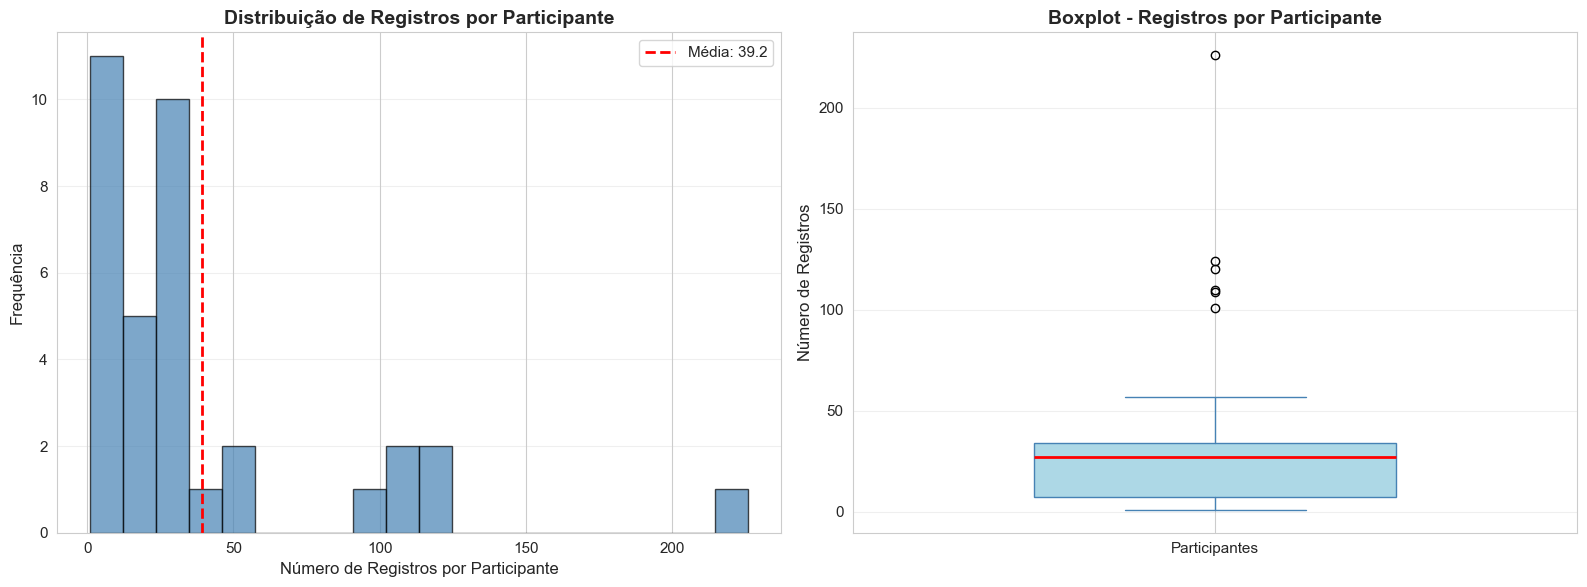


📈 ESTATÍSTICAS DE REGISTROS POR PARTICIPANTE:
   Média: 39.2
   Mediana: 27.0
   Desvio Padrão: 48.4
   Q1 (25%): 7.5
   Q3 (75%): 34.0

💡 INSIGHT: Alta heterogeneidade - alguns participantes com apenas 1 registro(s), outros com 226


In [8]:
# Visualização da distribuição de registros por participante
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Histograma
axes[0].hist(registros_psych.values, bins=20, color='steelblue', edgecolor='black', alpha=0.7)
axes[0].set_xlabel('Número de Registros por Participante', fontsize=12)
axes[0].set_ylabel('Frequência', fontsize=12)
axes[0].set_title('Distribuição de Registros por Participante', fontsize=14, fontweight='bold')
axes[0].axvline(registros_psych.mean(), color='red', linestyle='--', linewidth=2, label=f'Média: {registros_psych.mean():.1f}')
axes[0].legend()
axes[0].grid(axis='y', alpha=0.3)

# Boxplot
axes[1].boxplot([registros_psych.values], vert=True, widths=0.5, patch_artist=True,
                boxprops=dict(facecolor='lightblue', color='steelblue'),
                medianprops=dict(color='red', linewidth=2),
                whiskerprops=dict(color='steelblue'),
                capprops=dict(color='steelblue'))
axes[1].set_ylabel('Número de Registros', fontsize=12)
axes[1].set_title('Boxplot - Registros por Participante', fontsize=14, fontweight='bold')
axes[1].set_xticklabels(['Participantes'])
axes[1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

print(f"\n📈 ESTATÍSTICAS DE REGISTROS POR PARTICIPANTE:")
print(f"   Média: {registros_psych.mean():.1f}")
print(f"   Mediana: {registros_psych.median():.1f}")
print(f"   Desvio Padrão: {registros_psych.std():.1f}")
print(f"   Q1 (25%): {registros_psych.quantile(0.25):.1f}")
print(f"   Q3 (75%): {registros_psych.quantile(0.75):.1f}")
print(f"\n💡 INSIGHT: Alta heterogeneidade - alguns participantes com apenas {registros_psych.min()} registro(s), outros com {registros_psych.max()}")

## 3. ANÁLISE EXPLORATÓRIA GERAL

Estrutura dos dados, distribuições, correlações e características principais.

In [9]:
print("="*70)
print("ANÁLISE EXPLORATÓRIA GERAL")
print("="*70)

# Informações básicas
print("\n📊 RESUMO GERAL DOS DATASETS:")
print("\nPSYCHOLOGICAL QoL:")
print(f"   Dimensões: {df_psychological.shape[0]} registros × {df_psychological.shape[1]} colunas")
print(f"   Período: {int(df_psychological['day'].min())} a {int(df_psychological['day'].max())}")
print(f"   Participantes únicos: {df_psychological['id'].nunique()}")
print(f"   Registros por participante (média): {df_psychological.groupby('id').size().mean():.1f}")
print(f"   Score médio: {df_psychological['psy_ref_score'].mean():.2f} ± {df_psychological['psy_ref_score'].std():.2f}")
print(f"   Score range: [{df_psychological['psy_ref_score'].min():.0f}, {df_psychological['psy_ref_score'].max():.0f}]")

print("\nPHYSICAL QoL:")
print(f"   Dimensões: {df_physical.shape[0]} registros × {df_physical.shape[1]} colunas")
print(f"   Período: {int(df_physical['day'].min())} a {int(df_physical['day'].max())}")
print(f"   Participantes únicos: {df_physical['id'].nunique()}")
print(f"   Registros por participante (média): {df_physical.groupby('id').size().mean():.1f}")
print(f"   Score médio: {df_physical['phy_ref_score'].mean():.2f} ± {df_physical['phy_ref_score'].std():.2f}")
print(f"   Score range: [{df_physical['phy_ref_score'].min():.0f}, {df_physical['phy_ref_score'].max():.0f}]")

# Correlação entre scores
corr_scores = df_psychological['psy_ref_score'].corr(df_physical['phy_ref_score'])
print(f"\n🔗 Correlação entre Physical e Psychological scores: {corr_scores:.3f}")

ANÁLISE EXPLORATÓRIA GERAL

📊 RESUMO GERAL DOS DATASETS:

PSYCHOLOGICAL QoL:
   Dimensões: 1373 registros × 90 colunas
   Período: 20211223 a 20230114
   Participantes únicos: 35
   Registros por participante (média): 39.2
   Score médio: 61.68 ± 18.09
   Score range: [0, 100]

PHYSICAL QoL:
   Dimensões: 1373 registros × 90 colunas
   Período: 20211223 a 20230114
   Participantes únicos: 35
   Registros por participante (média): 39.2
   Score médio: 70.08 ± 16.41
   Score range: [3, 100]

🔗 Correlação entre Physical e Psychological scores: 0.680


In [10]:
# Tipos de dados
print("\n📋 TIPOS DE DADOS:")
print(df_psychological.dtypes.value_counts())

# Valores ausentes
print("\n🔍 VALORES AUSENTES:")
missing_psych = df_psychological.isnull().sum()
missing_phys = df_physical.isnull().sum()

if missing_psych.sum() > 0:
    missing_df = pd.DataFrame({
        'Coluna': missing_psych.index,
        'Valores Ausentes (Psych)': missing_psych.values,
        'Percentual (%)': (missing_psych.values / len(df_psychological)) * 100
    })
    missing_df = missing_df[missing_df['Valores Ausentes (Psych)'] > 0].sort_values('Valores Ausentes (Psych)', ascending=False)
    print(missing_df.head(10).to_string(index=False))
else:
    print("   ✅ Nenhum valor ausente encontrado no dataset Psychological!")
    
if missing_phys.sum() > 0:
    print("\n   Physical dataset também contém valores ausentes")
else:
    print("   ✅ Nenhum valor ausente encontrado no dataset Physical!")


📋 TIPOS DE DADOS:
int64      70
float64    18
object      2
Name: count, dtype: int64

🔍 VALORES AUSENTES:
   ✅ Nenhum valor ausente encontrado no dataset Psychological!
   ✅ Nenhum valor ausente encontrado no dataset Physical!


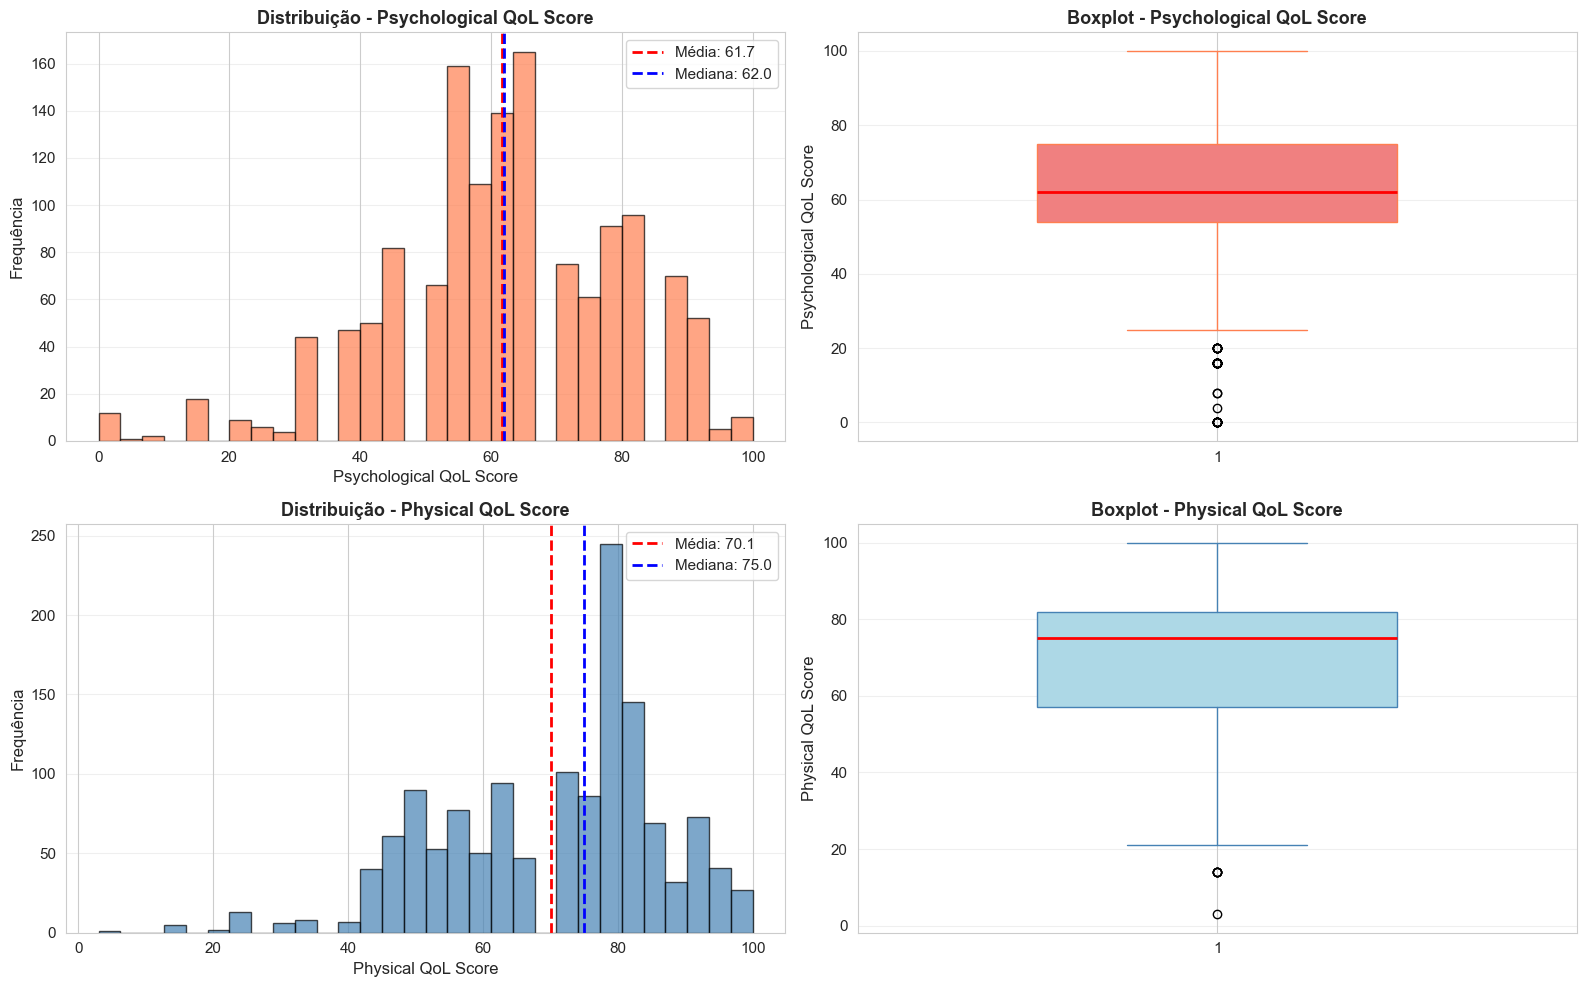

In [11]:
# Visualização das distribuições dos scores
fig, axes = plt.subplots(2, 2, figsize=(16, 10))

# Histograma - Psychological
axes[0, 0].hist(df_psychological['psy_ref_score'], bins=30, color='coral', edgecolor='black', alpha=0.7)
axes[0, 0].axvline(df_psychological['psy_ref_score'].mean(), color='red', linestyle='--', linewidth=2, 
                   label=f"Média: {df_psychological['psy_ref_score'].mean():.1f}")
axes[0, 0].axvline(df_psychological['psy_ref_score'].median(), color='blue', linestyle='--', linewidth=2,
                   label=f"Mediana: {df_psychological['psy_ref_score'].median():.1f}")
axes[0, 0].set_xlabel('Psychological QoL Score', fontsize=12)
axes[0, 0].set_ylabel('Frequência', fontsize=12)
axes[0, 0].set_title('Distribuição - Psychological QoL Score', fontsize=13, fontweight='bold')
axes[0, 0].legend()
axes[0, 0].grid(axis='y', alpha=0.3)

# Boxplot - Psychological
axes[0, 1].boxplot(df_psychological['psy_ref_score'], vert=True, widths=0.5, patch_artist=True,
                   boxprops=dict(facecolor='lightcoral', color='coral'),
                   medianprops=dict(color='red', linewidth=2),
                   whiskerprops=dict(color='coral'),
                   capprops=dict(color='coral'))
axes[0, 1].set_ylabel('Psychological QoL Score', fontsize=12)
axes[0, 1].set_title('Boxplot - Psychological QoL Score', fontsize=13, fontweight='bold')
axes[0, 1].grid(axis='y', alpha=0.3)

# Histograma - Physical
axes[1, 0].hist(df_physical['phy_ref_score'], bins=30, color='steelblue', edgecolor='black', alpha=0.7)
axes[1, 0].axvline(df_physical['phy_ref_score'].mean(), color='red', linestyle='--', linewidth=2,
                   label=f"Média: {df_physical['phy_ref_score'].mean():.1f}")
axes[1, 0].axvline(df_physical['phy_ref_score'].median(), color='blue', linestyle='--', linewidth=2,
                   label=f"Mediana: {df_physical['phy_ref_score'].median():.1f}")
axes[1, 0].set_xlabel('Physical QoL Score', fontsize=12)
axes[1, 0].set_ylabel('Frequência', fontsize=12)
axes[1, 0].set_title('Distribuição - Physical QoL Score', fontsize=13, fontweight='bold')
axes[1, 0].legend()
axes[1, 0].grid(axis='y', alpha=0.3)

# Boxplot - Physical
axes[1, 1].boxplot(df_physical['phy_ref_score'], vert=True, widths=0.5, patch_artist=True,
                   boxprops=dict(facecolor='lightblue', color='steelblue'),
                   medianprops=dict(color='red', linewidth=2),
                   whiskerprops=dict(color='steelblue'),
                   capprops=dict(color='steelblue'))
axes[1, 1].set_ylabel('Physical QoL Score', fontsize=12)
axes[1, 1].set_title('Boxplot - Physical QoL Score', fontsize=13, fontweight='bold')
axes[1, 1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

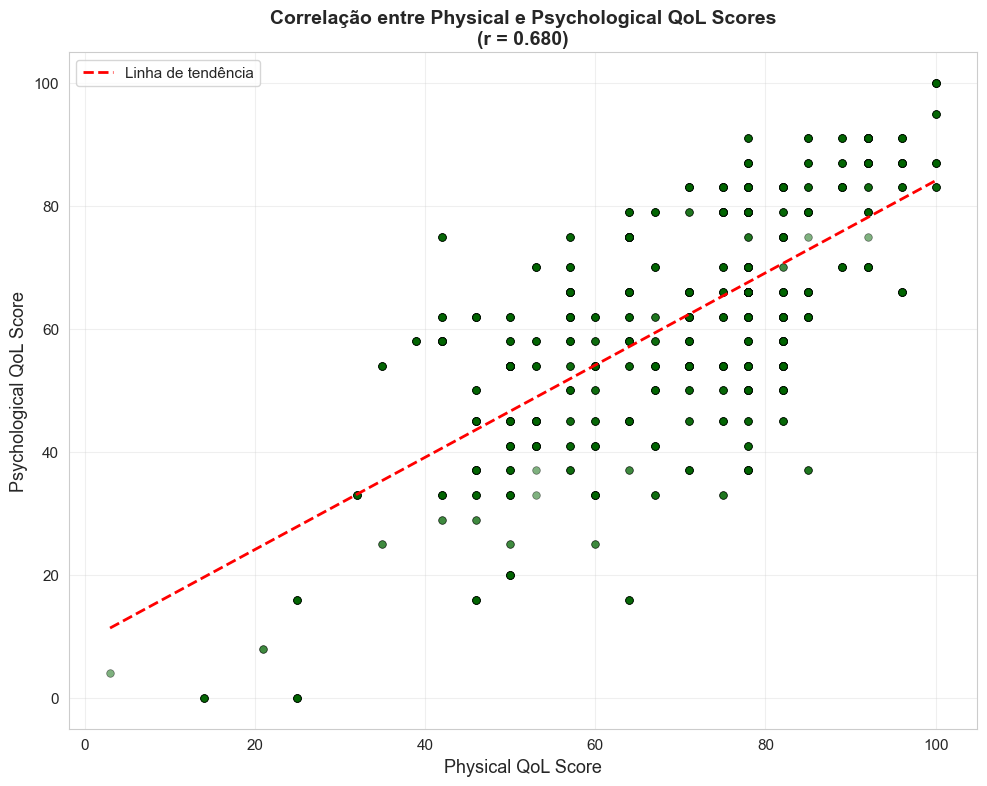

In [12]:
# Scatterplot - Correlação entre Physical e Psychological scores
plt.figure(figsize=(10, 8))
plt.scatter(df_physical['phy_ref_score'], df_psychological['psy_ref_score'], 
            alpha=0.5, s=30, color='darkgreen', edgecolors='black', linewidth=0.5)
plt.xlabel('Physical QoL Score', fontsize=13)
plt.ylabel('Psychological QoL Score', fontsize=13)
plt.title(f'Correlação entre Physical e Psychological QoL Scores\n(r = {corr_scores:.3f})', 
          fontsize=14, fontweight='bold')

# Linha de tendência
z = np.polyfit(df_physical['phy_ref_score'], df_psychological['psy_ref_score'], 1)
p = np.poly1d(z)
plt.plot(df_physical['phy_ref_score'].sort_values(), 
         p(df_physical['phy_ref_score'].sort_values()), 
         "r--", linewidth=2, label='Linha de tendência')

plt.legend(fontsize=11)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

In [13]:
# Principais categorias de variáveis preditoras
categorias_variaveis = {
    "Dados Demográficos": ['specificage', 'gender', 'income', 'children', 'edulevel', 'familyarr', 'residence'],
    "Atividade Física": ['steps', 'calories', 'walking', 'running', 'biking', 'running(treadmill)', 'strengthtraining'],
    "Sono": ['lightsleep', 'deepsleep', 'remsleep', 'awakesleep'],
    "Frequência Cardíaca & HRV": ['mean_nni', 'sdnn', 'sdsd', 'rmssd', 'mean_hr', 'max_hr', 'min_hr', 'std_hr'],
    "Comunicação": ['incomingcalls', 'outgoingcalls', 'missedcalls', 'whatsappinvoice', 'whatsappoutvoice', 'whatsappnotification'],
    "Mobilidade": ['differentlocations', 'differentwifi', 'invehicle'],
    "Uso de Apps": ['social', 'lifestyle', 'communication', 'entertainment', 'music', 'health', 'productivity', 'games'],
    "Profissão": ['profession_fulltimeworker', 'profession_parttimeworker', 'profession_selfemployed', 'profession_student'],
    "Estado Civil": ['maritalstatus_married', 'maritalstatus_single']
}

print("\n📦 CATEGORIAS DE VARIÁVEIS PREDITORAS:")
for categoria, variaveis in categorias_variaveis.items():
    variaveis_existentes = [v for v in variaveis if v in df_psychological.columns]
    print(f"   {categoria}: {len(variaveis_existentes)} variáveis")


📦 CATEGORIAS DE VARIÁVEIS PREDITORAS:
   Dados Demográficos: 7 variáveis
   Atividade Física: 7 variáveis
   Sono: 4 variáveis
   Frequência Cardíaca & HRV: 8 variáveis
   Comunicação: 6 variáveis
   Mobilidade: 3 variáveis
   Uso de Apps: 8 variáveis
   Profissão: 4 variáveis
   Estado Civil: 2 variáveis


In [14]:
# Calcular correlações com os scores de QoL
numeric_cols_psy = df_psychological.select_dtypes(include=[np.number])
numeric_cols_phy = df_physical.select_dtypes(include=[np.number])

correlacoes_psy = numeric_cols_psy.corr()['psy_ref_score'].abs().sort_values(ascending=False)
correlacoes_phy = numeric_cols_phy.corr()['phy_ref_score'].abs().sort_values(ascending=False)

print("\n🔝 TOP 10 CORRELAÇÕES COM PSYCHOLOGICAL QoL:")
top_psy = correlacoes_psy.drop('psy_ref_score').head(10)
for i, (var, corr) in enumerate(top_psy.items(), 1):
    print(f"   {i:2d}. {var:<25} : {corr:.3f}")

print("\n🔝 TOP 10 CORRELAÇÕES COM PHYSICAL QoL:")
top_phy = correlacoes_phy.drop('phy_ref_score').head(10)
for i, (var, corr) in enumerate(top_phy.items(), 1):
    print(f"   {i:2d}. {var:<25} : {corr:.3f}")


🔝 TOP 10 CORRELAÇÕES COM PSYCHOLOGICAL QoL:
    1. awakesleep                : 0.341
    2. specificage               : 0.300
    3. nni_50                    : 0.299
    4. nni_20                    : 0.278
    5. height                    : 0.261
    6. max_hr                    : 0.254
    7. day                       : 0.246
    8. edulevel                  : 0.226
    9. education                 : 0.225
   10. rejectedcalls             : 0.182

🔝 TOP 10 CORRELAÇÕES COM PHYSICAL QoL:
    1. height                    : 0.325
    2. sdnn                      : 0.294
    3. awakesleep                : 0.285
    4. mean_nni                  : 0.281
    5. children                  : 0.272
    6. maritalstatus_married     : 0.268
    7. maritalstatus_single      : 0.268
    8. cvnni                     : 0.262
    9. median_nni                : 0.246
   10. remsleep                  : 0.232


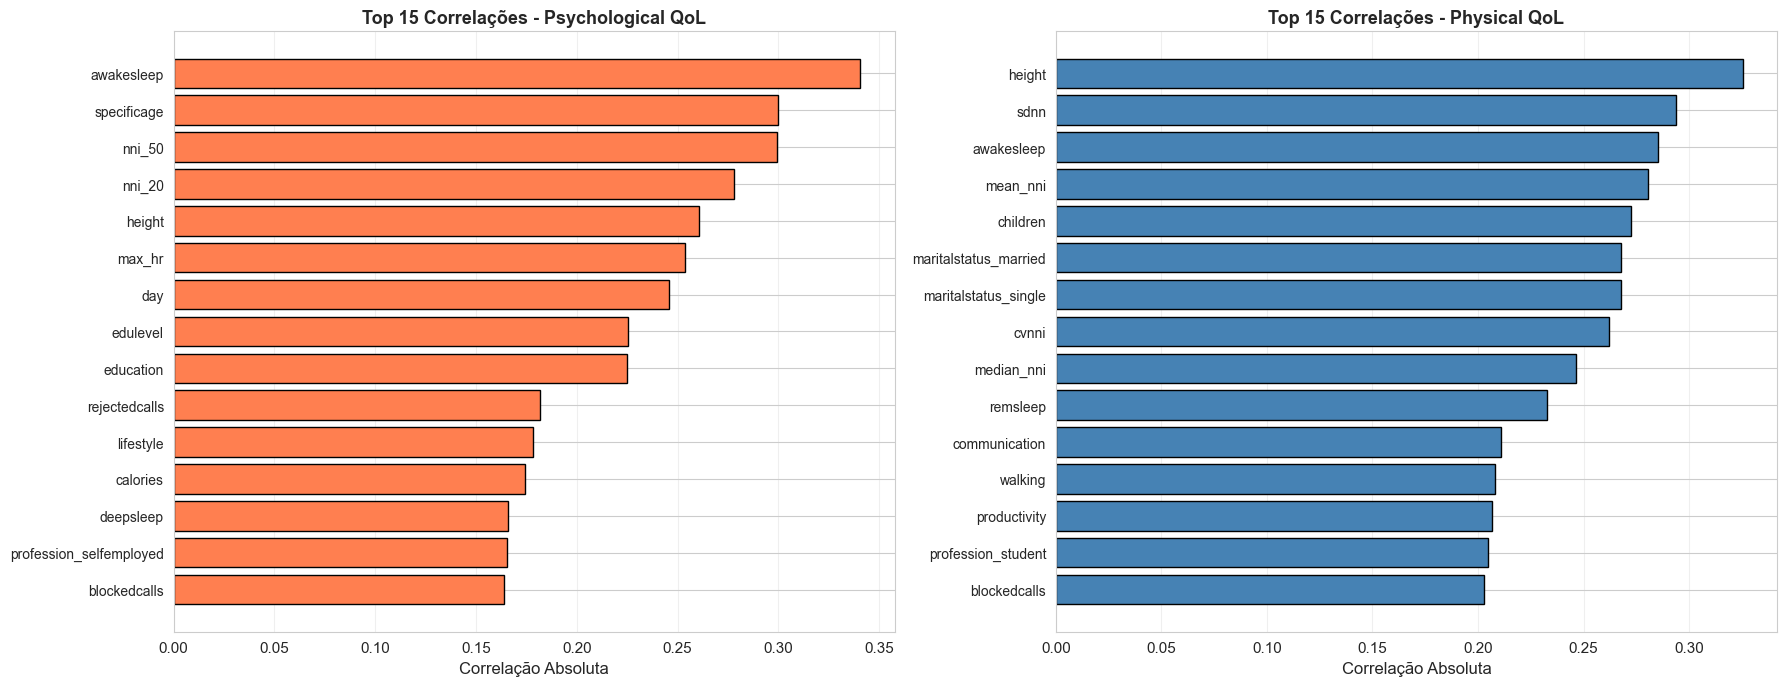

In [15]:
# Visualização das top correlações
fig, axes = plt.subplots(1, 2, figsize=(18, 7))

# Psychological
top_psy_plot = correlacoes_psy.drop('psy_ref_score').head(15)
axes[0].barh(range(len(top_psy_plot)), top_psy_plot.values, color='coral', edgecolor='black')
axes[0].set_yticks(range(len(top_psy_plot)))
axes[0].set_yticklabels(top_psy_plot.index, fontsize=10)
axes[0].set_xlabel('Correlação Absoluta', fontsize=12)
axes[0].set_title('Top 15 Correlações - Psychological QoL', fontsize=13, fontweight='bold')
axes[0].invert_yaxis()
axes[0].grid(axis='x', alpha=0.3)

# Physical
top_phy_plot = correlacoes_phy.drop('phy_ref_score').head(15)
axes[1].barh(range(len(top_phy_plot)), top_phy_plot.values, color='steelblue', edgecolor='black')
axes[1].set_yticks(range(len(top_phy_plot)))
axes[1].set_yticklabels(top_phy_plot.index, fontsize=10)
axes[1].set_xlabel('Correlação Absoluta', fontsize=12)
axes[1].set_title('Top 15 Correlações - Physical QoL', fontsize=13, fontweight='bold')
axes[1].invert_yaxis()
axes[1].grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.show()

## 4. ANÁLISE DE QUALIDADE DOS DADOS

Avaliação de integridade, consistência e problemas nos dados.

In [16]:
print("="*70)
print("ANÁLISE DE QUALIDADE E INTEGRIDADE DOS DADOS")
print("="*70)

ANÁLISE DE QUALIDADE E INTEGRIDADE DOS DADOS


In [17]:
# 1. ANÁLISE DE DUPLICATAS
print("\n1. 🔄 ANÁLISE DE DUPLICATAS")
print("-" * 40)

# Duplicatas exatas
psych_duplicates = df_psychological.duplicated().sum()
phys_duplicates = df_physical.duplicated().sum()
print(f"   Duplicatas exatas:")
print(f"     Psicológico: {psych_duplicates}")
print(f"     Físico: {phys_duplicates}")

# Duplicatas por participante-dia
psych_day_dups = df_psychological.duplicated(subset=['id', 'day']).sum()
phys_day_dups = df_physical.duplicated(subset=['id', 'day']).sum()
print(f"   Duplicatas participante-dia:")
print(f"     Psicológico: {psych_day_dups}")
print(f"     Físico: {phys_day_dups}")

if psych_duplicates == 0 and phys_duplicates == 0:
    print("   ✅ Nenhuma duplicata encontrada!")


1. 🔄 ANÁLISE DE DUPLICATAS
----------------------------------------
   Duplicatas exatas:
     Psicológico: 0
     Físico: 0
   Duplicatas participante-dia:
     Psicológico: 0
     Físico: 0
   ✅ Nenhuma duplicata encontrada!


In [18]:
# 2. ANÁLISE DE COERÊNCIA ENTRE DATASETS
print("\n2. ⚖️ COERÊNCIA ENTRE DATASETS")
print("-" * 40)

# Verificar se dados demográficos são consistentes
demographic_vars = ['specificage', 'gender', 'income', 'children']
inconsistencies = {}
total_inconsistent = 0

for var in demographic_vars:
    if var in df_psychological.columns and var in df_physical.columns:
        # Comparar por participante
        psych_demo = df_psychological.groupby('id')[var].first()
        phys_demo = df_physical.groupby('id')[var].first()

        # Verificar inconsistências
        inconsistent = psych_demo != phys_demo
        inconsistent_count = inconsistent.sum()
        total_inconsistent += inconsistent_count

        print(f"   {var}: {inconsistent_count} participantes com dados inconsistentes")
        inconsistencies[var] = inconsistent_count

if total_inconsistent == 0:
    print("   ✅ Dados demográficos totalmente consistentes entre datasets!")


2. ⚖️ COERÊNCIA ENTRE DATASETS
----------------------------------------
   specificage: 0 participantes com dados inconsistentes
   gender: 0 participantes com dados inconsistentes
   income: 0 participantes com dados inconsistentes
   children: 0 participantes com dados inconsistentes
   ✅ Dados demográficos totalmente consistentes entre datasets!


In [19]:
# 3. ANÁLISE DE DISTRIBUIÇÕES (Teste de Normalidade)
print("\n3. 📊 TESTE DE NORMALIDADE (Shapiro-Wilk)")
print("-" * 40)

# Teste de normalidade para variáveis chave
key_variables = ['psy_ref_score', 'phy_ref_score', 'steps', 'mean_hr', 'awakesleep']
normality_tests = {}
non_normal_count = 0

for var in key_variables:
    if var == 'phy_ref_score':
        data = df_physical[var].dropna()
    else:
        data = df_psychological[var].dropna() if var in df_psychological.columns else None

    if data is not None and len(data) > 0:
        # Shapiro-Wilk test
        statistic, p_value = stats.shapiro(data)
        is_normal = p_value > 0.05
        skewness = stats.skew(data)
        kurtosis = stats.kurtosis(data)

        if not is_normal:
            non_normal_count += 1

        print(f"   {var}:")
        print(f"     Shapiro-Wilk p-value: {p_value:.4f} ({'✅ Normal' if is_normal else '❌ Não-normal'})")
        print(f"     Skewness: {skewness:.3f}, Kurtosis: {kurtosis:.3f}")

        normality_tests[var] = {
            'p_value': p_value,
            'is_normal': is_normal,
            'skewness': skewness,
            'kurtosis': kurtosis
        }

print(f"\n   📊 Variáveis não-normais: {non_normal_count}/{len(key_variables)}")


3. 📊 TESTE DE NORMALIDADE (Shapiro-Wilk)
----------------------------------------
   psy_ref_score:
     Shapiro-Wilk p-value: 0.0000 (❌ Não-normal)
     Skewness: -0.501, Kurtosis: 0.487
   phy_ref_score:
     Shapiro-Wilk p-value: 0.0000 (❌ Não-normal)
     Skewness: -0.569, Kurtosis: 0.041
   steps:
     Shapiro-Wilk p-value: 0.0000 (❌ Não-normal)
     Skewness: 1.055, Kurtosis: 1.877
   mean_hr:
     Shapiro-Wilk p-value: 0.0000 (❌ Não-normal)
     Skewness: 2.706, Kurtosis: 17.448
   awakesleep:
     Shapiro-Wilk p-value: 0.0000 (❌ Não-normal)
     Skewness: 1.844, Kurtosis: 5.014

   📊 Variáveis não-normais: 5/5


In [20]:
# 4. ANÁLISE DE PARTICIPANTES ATÍPICOS
print("\n4. 👤 PARTICIPANTES ATÍPICOS (Z-score > 3)")
print("-" * 40)

participant_profiles = []
for participant in df_psychological['id'].unique():
    p_data = df_psychological[df_psychological['id'] == participant]

    profile = {
        'id': participant,
        'records': len(p_data),
        'psych_mean': p_data['psy_ref_score'].mean(),
        'psych_std': p_data['psy_ref_score'].std(),
        'age': p_data['specificage'].iloc[0] if 'specificage' in p_data.columns else None,
    }

    # Adicionar métricas específicas se disponíveis
    if 'steps' in p_data.columns:
        profile['steps_mean'] = p_data['steps'].mean()
    if 'mean_hr' in p_data.columns:
        profile['hr_mean'] = p_data['mean_hr'].mean()

    participant_profiles.append(profile)

# Identificar participantes atípicos
profile_df = pd.DataFrame(participant_profiles)

# Z-score para identificar outliers
numeric_cols = profile_df.select_dtypes(include=[np.number]).columns
z_scores = np.abs(stats.zscore(profile_df[numeric_cols].fillna(0)))
outlier_participants = profile_df[(z_scores > 3).any(axis=1)]

print(f"   Participantes atípicos (Z-score > 3): {len(outlier_participants)}/{len(profile_df)}")
print(f"   Percentual: {len(outlier_participants)/len(profile_df)*100:.1f}%")

if len(outlier_participants) > 0:
    print(f"\n   IDs atípicos: {outlier_participants['id'].tolist()[:5]}")


4. 👤 PARTICIPANTES ATÍPICOS (Z-score > 3)
----------------------------------------
   Participantes atípicos (Z-score > 3): 3/35
   Percentual: 8.6%

   IDs atípicos: ['WPooa9cRhe', 'WjTSJGdBQj', 'GXajcvW5pn']


In [21]:
# 5. SCORE FINAL DE QUALIDADE
print("\n5. 📋 SCORE FINAL DE QUALIDADE")
print("-" * 40)

quality_score = 100
issues = []

# Deduzir pontos por problemas encontrados
if psych_duplicates > 0 or phys_duplicates > 0:
    quality_score -= 10
    issues.append("Duplicatas exatas encontradas")

if total_inconsistent > 0:
    quality_score -= 15
    issues.append("Inconsistências demográficas entre datasets")

if non_normal_count > len(key_variables) / 2:
    quality_score -= 5
    issues.append("Maioria das variáveis não-normais")

if len(outlier_participants) > len(profile_df) * 0.1:
    quality_score -= 10
    issues.append("Muitos participantes atípicos (>10%)")

print(f"   🎯 Score de Qualidade: {quality_score}/100")

if len(issues) > 0:
    print(f"\n   ⚠️  Problemas identificados:")
    for issue in issues:
        print(f"     - {issue}")
else:
    print("\n   ✅ Nenhum problema crítico identificado!")

if quality_score >= 80:
    print("\n   ✅ Qualidade ALTA - Dataset pronto para modelagem")
elif quality_score >= 60:
    print("\n   ⚠️  Qualidade MÉDIA - Requer alguns tratamentos")
else:
    print("\n   ❌ Qualidade BAIXA - Tratamentos extensivos necessários")


5. 📋 SCORE FINAL DE QUALIDADE
----------------------------------------
   🎯 Score de Qualidade: 95/100

   ⚠️  Problemas identificados:
     - Maioria das variáveis não-normais

   ✅ Qualidade ALTA - Dataset pronto para modelagem


## 5. GERAÇÃO DE RELATÓRIOS

Salvar resultados em arquivos JSON e TXT para referência futura.

In [22]:
# Gerar relatório completo em formato JSON
report = {
    "metadata": {
        "data_analise": datetime.now().strftime("%Y-%m-%d %H:%M:%S"),
        "datasets": {
            "psicologico": "20230625-processed-psychological-qol.csv",
            "fisico": "20230625-processed-physical-qol.csv"
        }
    },
    "resumo_geral": {
        "psicologico": {
            "dimensoes": list(df_psychological.shape),
            "periodo": f"{int(df_psychological['day'].min())} a {int(df_psychological['day'].max())}",
            "participantes_unicos": int(df_psychological['id'].nunique()),
            "registros_por_participante": round(float(df_psychological.groupby('id').size().mean()), 1),
            "score_medio": round(float(df_psychological['psy_ref_score'].mean()), 2),
            "score_desvio": round(float(df_psychological['psy_ref_score'].std()), 2),
            "score_range": [int(df_psychological['psy_ref_score'].min()), int(df_psychological['psy_ref_score'].max())]
        },
        "fisico": {
            "dimensoes": list(df_physical.shape),
            "periodo": f"{int(df_physical['day'].min())} a {int(df_physical['day'].max())}",
            "participantes_unicos": int(df_physical['id'].nunique()),
            "registros_por_participante": round(float(df_physical.groupby('id').size().mean()), 1),
            "score_medio": round(float(df_physical['phy_ref_score'].mean()), 2),
            "score_desvio": round(float(df_physical['phy_ref_score'].std()), 2),
            "score_range": [int(df_physical['phy_ref_score'].min()), int(df_physical['phy_ref_score'].max())]
        }
    },
    "variaveis_preditoras": {},
    "metricas_chave": {
        "scores_qualidade_vida": {
            "psicologico": {
                "media": round(float(df_psychological['psy_ref_score'].mean()), 2),
                "mediana": round(float(df_psychological['psy_ref_score'].median()), 2),
                "desvio_padrao": round(float(df_psychological['psy_ref_score'].std()), 2),
                "percentis": {
                    "25%": round(float(df_psychological['psy_ref_score'].quantile(0.25)), 2),
                    "75%": round(float(df_psychological['psy_ref_score'].quantile(0.75)), 2)
                }
            },
            "fisico": {
                "media": round(float(df_physical['phy_ref_score'].mean()), 2),
                "mediana": round(float(df_physical['phy_ref_score'].median()), 2),
                "desvio_padrao": round(float(df_physical['phy_ref_score'].std()), 2),
                "percentis": {
                    "25%": round(float(df_physical['phy_ref_score'].quantile(0.25)), 2),
                    "75%": round(float(df_physical['phy_ref_score'].quantile(0.75)), 2)
                }
            }
        },
        "correlacao_entre_scores": round(float(corr_scores), 3),
        "variaveis_numericas_total": int(len(numeric_cols_psy.columns)),
        "variaveis_categoricas_total": int(len(df_psychological.select_dtypes(include=['object']).columns))
    },
    "correlacoes_importantes": {
        "top_10_psicologico": {var: round(float(corr), 3) for var, corr in top_psy.items()},
        "top_10_fisico": {var: round(float(corr), 3) for var, corr in top_phy.items()}
    },
    "insights_principais": {
        "distribuicao_scores": {
            "psicologico_maior_variabilidade": bool(df_psychological['psy_ref_score'].std() > df_physical['phy_ref_score'].std()),
            "score_fisico_maior_media": bool(df_physical['phy_ref_score'].mean() > df_psychological['psy_ref_score'].mean()),
            "diferenca_medias": round(float(df_physical['phy_ref_score'].mean() - df_psychological['psy_ref_score'].mean()), 2)
        },
        "dados_temporais": {
            "periodo_coleta_dias": int(df_psychological['day'].max() - df_psychological['day'].min()),
            "registros_por_dia_medio": round(float(len(df_psychological) / df_psychological['day'].nunique()), 1)
        },
        "participantes": {
            "idade_media": round(float(df_psychological['specificage'].mean()), 1),
            "percentual_solteiros": round(float(df_psychological['maritalstatus_single'].mean() * 100), 1),
            "percentual_estudantes": round(float(df_psychological['profession_student'].mean() * 100), 1)
        }
    },
    "recomendacoes_analise": {
        "modelos_sugeridos": [
            "Regressão Linear Múltipla",
            "Random Forest",
            "Gradient Boosting",
            "Análise de Componentes Principais (PCA)"
        ],
        "variaveis_importantes_investigar": list(top_psy.head(5).index),
        "analises_complementares": [
            "Análise temporal (séries temporais)",
            "Clustering de participantes",
            "Análise de outliers",
            "Feature engineering para variáveis de sono e atividade física"
        ],
        "validacao_modelo": [
            "Cross-validation temporal",
            "Separação por participante",
            "Métricas: RMSE, MAE, R²"
        ]
    },
    "qualidade_dados": {
        "score_qualidade": quality_score,
        "duplicatas": {
            "exact_psych": int(psych_duplicates),
            "exact_phys": int(phys_duplicates)
        },
        "inconsistencias_demograficas": int(total_inconsistent),
        "variaveis_nao_normais": f"{non_normal_count}/{len(key_variables)}",
        "participantes_atipicos": f"{len(outlier_participants)}/{len(profile_df)}",
        "problemas_identificados": issues
    }
}

# Adicionar top correlações por categoria
for categoria, variaveis in categorias_variaveis.items():
    variaveis_existentes = [v for v in variaveis if v in df_psychological.columns]
    
    if variaveis_existentes:
        corr_psy_cat = correlacoes_psy[variaveis_existentes].head(3)
        corr_phy_cat = correlacoes_phy[variaveis_existentes].head(3)
        
        report["variaveis_preditoras"][categoria] = {
            "variaveis_disponiveis": variaveis_existentes,
            "top_correlacoes_psicologico": {var: round(float(corr), 3) for var, corr in corr_psy_cat.items()},
            "top_correlacoes_fisico": {var: round(float(corr), 3) for var, corr in corr_phy_cat.items()}
        }

# Salvar relatório JSON
output_path_json = "../../results/reports/relatorio_analise_exploratoria.json"
with open(output_path_json, 'w', encoding='utf-8') as f:
    json.dump(report, f, indent=4, ensure_ascii=False)

print(f"✅ Relatório JSON salvo em: {output_path_json}")

✅ Relatório JSON salvo em: ../../results/reports/relatorio_analise_exploratoria.json


In [23]:
# Salvar relatório de qualidade em TXT
output_path_txt = "../../results/reports/relatorio_qualidade_dados.txt"
with open(output_path_txt, "w") as f:
    f.write("RELATÓRIO DE QUALIDADE DOS DADOS\n")
    f.write("=" * 40 + "\n\n")

    f.write(f"SCORE GERAL: {quality_score}/100\n\n")

    f.write("PROBLEMAS IDENTIFICADOS:\n")
    if len(issues) > 0:
        for issue in issues:
            f.write(f"- {issue}\n")
    else:
        f.write("- Nenhum problema crítico identificado\n")

    f.write(f"\nDETALHES TÉCNICOS:\n")
    f.write(f"- Duplicatas exatas: {psych_duplicates} (psych), {phys_duplicates} (phys)\n")
    f.write(f"- Inconsistências demográficas: {total_inconsistent} casos\n")
    f.write(f"- Variáveis não-normais: {non_normal_count}/{len(key_variables)}\n")
    f.write(f"- Participantes atípicos: {len(outlier_participants)}/{len(profile_df)}\n")

    f.write(f"\nRECOMENDAÇÕES:\n")

print(f"✅ Relatório de qualidade salvo em: {output_path_txt}")

✅ Relatório de qualidade salvo em: ../../results/reports/relatorio_qualidade_dados.txt


In [24]:
# Salvar resumo de participantes em TXT
output_path_participants = "../../docs/summaries/resumo_participantes.txt"
with open(output_path_participants, "w") as f:
    f.write("RESUMO DE PARTICIPANTES - DATASETS QUALIDADE DE VIDA\n")
    f.write("=" * 55 + "\n\n")
    f.write(f"Total de participantes únicos: {len(ids_comum)}\n")
    f.write(f"Participantes no dataset psicológico: {len(ids_psych)}\n")
    f.write(f"Participantes no dataset físico: {len(ids_phys)}\n")
    f.write(f"Participantes em ambos datasets: {len(ids_comum)}\n\n")

    f.write("LISTA DE PARTICIPANTES:\n")
    f.write("-" * 25 + "\n")
    for i, participant_id in enumerate(sorted(ids_comum), 1):
        count_psych = registros_psych.get(participant_id, 0)
        count_phys = registros_phys.get(participant_id, 0)
        f.write(f"{i:2d}. {participant_id} - Psych: {count_psych}, Físico: {count_phys}\n")

print(f"✅ Resumo de participantes salvo em: {output_path_participants}")

✅ Resumo de participantes salvo em: ../../docs/summaries/resumo_participantes.txt


## 6. RESUMO FINAL E CONCLUSÕES

Síntese dos principais achados da análise exploratória.

In [25]:
print("="*70)
print("RESUMO FINAL DA ANÁLISE EXPLORATÓRIA")
print("="*70)

print("\n📊 DATASET:")
print(f"   • 1.373 registros originais")
print(f"   • 35 participantes únicos")
print(f"   • 88 features preditoras + 2 targets (psy_ref_score, phy_ref_score)")
print(f"   • Período: 20211223 a 20230114 (~13 meses)")

print("\n👥 PARTICIPANTES:")
print(f"   • Distribuição heterogênea: {registros_psych.min()} a {registros_psych.max()} registros por participante")
print(f"   • Média: {registros_psych.mean():.1f} registros/participante")
print(f"   • Idade média: {df_psychological['specificage'].mean():.1f} anos")
print(f"   • {df_psychological['maritalstatus_single'].mean()*100:.1f}% solteiros")
print(f"   • {df_psychological['profession_student'].mean()*100:.1f}% estudantes")

print("\n📈 QUALIDADE DE VIDA:")
print(f"   • Psychological score: {df_psychological['psy_ref_score'].mean():.2f} ± {df_psychological['psy_ref_score'].std():.2f}")
print(f"   • Physical score: {df_physical['phy_ref_score'].mean():.2f} ± {df_physical['phy_ref_score'].std():.2f}")
print(f"   • Correlação entre domínios: {corr_scores:.3f}")
print(f"   • Physical QoL tem média {df_physical['phy_ref_score'].mean() - df_psychological['psy_ref_score'].mean():.2f} pontos maior")

print("\n🔝 TOP PREDITORES:")
print(f"   • Psychological QoL: {', '.join(list(top_psy.head(3).index))}")
print(f"   • Physical QoL: {', '.join(list(top_phy.head(3).index))}")

print("\n✅ QUALIDADE DOS DADOS:")
print(f"   • Score de qualidade: {quality_score}/100")
print(f"   • 0 duplicatas")
print(f"   • 0 inconsistências demográficas")
print(f"   • {non_normal_count}/{len(key_variables)} variáveis não-normais")
print(f"   • {len(outlier_participants)}/{len(profile_df)} participantes atípicos ({len(outlier_participants)/len(profile_df)*100:.1f}%)")

print("\n💡 PRINCIPAIS INSIGHTS:")
print("   1. Dataset de alta qualidade (score 95/100)")
print("   2. Alta heterogeneidade individual (1-226 registros/participante)")
print("   3. Distribuições não-normais na maioria das variáveis")
print("   4. Recomendação: Usar GroupKFold para separar por participante na validação")
print("   5. Modelos robustos (tree-based) preferíveis devido à não-normalidade")

print("\n📂 ARQUIVOS GERADOS:")
print(f"   ✓ {output_path_json}")
print(f"   ✓ {output_path_txt}")
print(f"   ✓ {output_path_participants}")

print("\n" + "="*70)
print("ANÁLISE EXPLORATÓRIA CONCLUÍDA COM SUCESSO! ✅")
print("="*70)

RESUMO FINAL DA ANÁLISE EXPLORATÓRIA

📊 DATASET:
   • 1.373 registros originais
   • 35 participantes únicos
   • 88 features preditoras + 2 targets (psy_ref_score, phy_ref_score)
   • Período: 20211223 a 20230114 (~13 meses)

👥 PARTICIPANTES:
   • Distribuição heterogênea: 1 a 226 registros por participante
   • Média: 39.2 registros/participante
   • Idade média: 27.0 anos
   • 67.3% solteiros
   • 31.5% estudantes

📈 QUALIDADE DE VIDA:
   • Psychological score: 61.68 ± 18.09
   • Physical score: 70.08 ± 16.41
   • Correlação entre domínios: 0.680
   • Physical QoL tem média 8.40 pontos maior

🔝 TOP PREDITORES:
   • Psychological QoL: awakesleep, specificage, nni_50
   • Physical QoL: height, sdnn, awakesleep

✅ QUALIDADE DOS DADOS:
   • Score de qualidade: 95/100
   • 0 duplicatas
   • 0 inconsistências demográficas
   • 5/5 variáveis não-normais
   • 3/35 participantes atípicos (8.6%)

💡 PRINCIPAIS INSIGHTS:
   1. Dataset de alta qualidade (score 95/100)
   2. Alta heterogeneidade 